In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
from IPython.lib.display import Audio
from scipy.fftpack import fft, ifft
from scipy.io import loadmat
import scipy.signal as sgnl
import scipy.io.wavfile as wav
import pyaudio
import sys
import wave
import operator
import scipy
from python_speech_features import mfcc

In [12]:
import scipy.io.wavfile as wav
import scipy.signal as sgnl
from python_speech_features import mfcc
import os

filter_data = loadmat('highpass(500).mat') # load the filter obtained from␣
Coeffs = filter_data['ba'].astype(np.float64) # getting filter coefficients
b = Coeffs[0,:] # first column is b
a = 1 # fir filter
# New base path reflecting the provided directory structure
base_path = r"C:\Users\hongj\OneDrive\바탕 화면\upload\Kendall's Tau\SAMPLES(UPDATED_Categorised)"


# Function to read all WAV files in a given species folder and process them
def process_wav_files(species_folder, variable_letter):
    species_path = os.path.join(base_path, species_folder)
    wav_files = [f for f in os.listdir(species_path) if f.endswith('.wav')]
    
    for wav_file in wav_files:
        # Extracting the sequence number from the file name
        sequence_number = wav_file.split('_')[-1].split('.')[0]
        raw_variable_name = f"{variable_letter}{sequence_number}"
        filtered_variable_name = f"{variable_letter}{sequence_number}_"
        mfcc_variable_name = f"mfcc_{variable_letter}{sequence_number}"
        
        full_path = os.path.join(species_path, wav_file)
        
        try:
            Fs, audio_data = wav.read(full_path)
            # Store raw audio data in global variable
            globals()[raw_variable_name] = audio_data
            
            # Filter the audio data and store it in a new global variable
            filtered_audio = sgnl.lfilter(b, a, audio_data)
            globals()[filtered_variable_name] = filtered_audio
            
            # Calculate the MFCC of the filtered audio and store it in another new global variable
            mfcc_data = mfcc(filtered_audio, Fs)
            globals()[mfcc_variable_name] = mfcc_data
            
        except IOError as e:
            print(f"Could not process file {full_path}: {e}")

# Process WAV files for Long-tailed Duck
process_wav_files("Long_tailed_Duck_Clangula_hyemalis", "a")

# Process WAV files for Velvet Scoter
process_wav_files("Velvet_Scoter_Melanitta_fusca", "b")

process_wav_files("Aquatic_Warbler_Acrocephalus_paludicola", "c")

process_wav_files("Atlantic_Puffin_Fratercula_arctica", "d")

process_wav_files("Balearic_Shearwater_Puffinus_mauretanicus", "e")

process_wav_files("Black_legged_Kittiwake_Rissa_tridactyla", "f")

process_wav_files("Great_Bustard_Otis_tarda", "g")

process_wav_files("Horned_Grebe_Podiceps_auritus", "h")

process_wav_files("Leach's_Storm_Petrel_Hydrobates_leucorhous", "i")

process_wav_files("European_Turtle_Dove_Streptopelia_turtur", "j")

In [13]:
mfcc_b8

array([[ 11.12821956, -21.08808878, -25.36465129, ...,   2.43903787,
         -2.00225945,  -8.52928947],
       [ 11.49944985, -24.00365751, -35.82858401, ...,  -9.42436161,
          1.40614995,  -7.25205275],
       [ 11.4673077 , -21.82353328, -34.24661994, ...,  -9.74742208,
          5.40896984,  -6.06449914],
       ...,
       [ 13.76172876, -17.3185092 , -47.14131774, ...,   0.8673242 ,
          5.63156937,  -4.99101737],
       [ 13.86034152,  -9.65115963, -38.01260746, ...,  -1.01584462,
          0.06813688,  -4.05376225],
       [ 13.70770902,  -9.51508434, -41.25079942, ...,  -4.69995413,
          0.62061713,  -5.11128852]])

Original audio input :


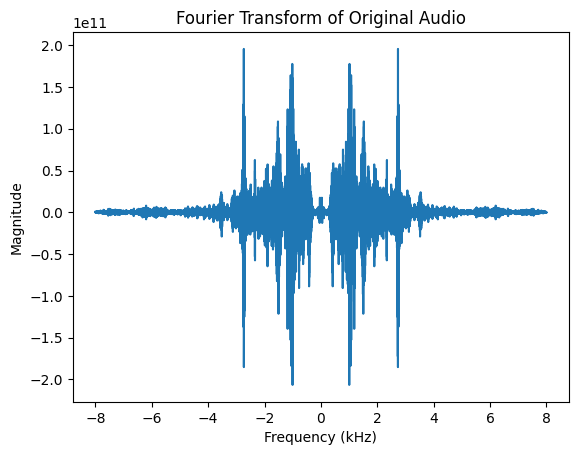

Filtered audio input :


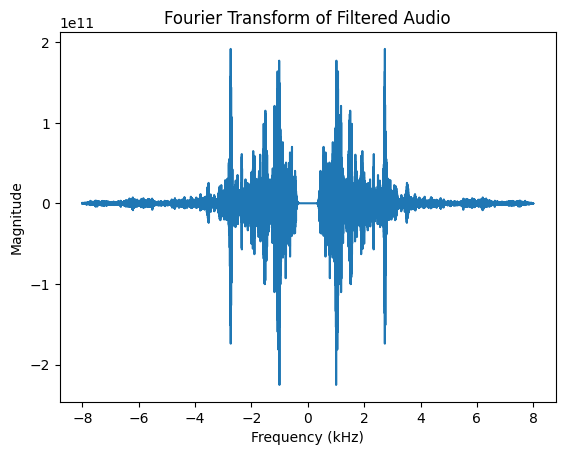

In [14]:
Fs, input_audio_Pure = wav.read("test\Balearic_Sheawater_2_TEST.wav")
#read to created file as input
#handling input_audio
display(Audio(input_audio_Pure, rate=Fs))#pure audio file
print('Original audio input :')

# Fourier transform of not-filtered input audio
N = 48000
w = np.linspace(-np.pi, np.pi, N)
input_fourier_noisy = np.fft.fftshift(np.fft.fft(input_audio_Pure, N))
frequency_kHz = Fs/(2*np.pi)*w/1000  # Convert w to kHz
plt.plot(frequency_kHz, np.real(input_fourier_noisy))
plt.title("Fourier Transform of Original Audio")
plt.xlabel("Frequency (kHz)")
plt.ylabel("Magnitude")
plt.show()


#lowpass, equiripple, 0.2pi cutoff frequency  filter, 
#designed for the denoising audio, designed on pyfda
filter_data = loadmat('highpass(500).mat') # load the filter obtained from␣
Coeffs = filter_data['ba'].astype(np.float64) # getting filter coefficients
b = Coeffs[0,:] # first column is b
a = 1 # fir filter

w, Hw = sgnl.freqz(b,a)

input_audio = sgnl.lfilter(b, a, input_audio_Pure) #filtering via convolution

display(Audio(input_audio, rate=Fs))
print("Filtered audio input :")

# Fourier transform of filtered input audio
w = np.linspace(-np.pi, np.pi, N)
input_fourier = np.fft.fftshift(np.fft.fft(input_audio, N))
frequency_kHz = Fs/(2*np.pi)*w/1000  # Convert w to kHz
plt.plot(frequency_kHz, np.real(input_fourier))
plt.title("Fourier Transform of Filtered Audio")
plt.xlabel("Frequency (kHz)")
plt.ylabel("Magnitude")
plt.show()

mfcc_input = mfcc(input_audio, Fs, numcep=13)


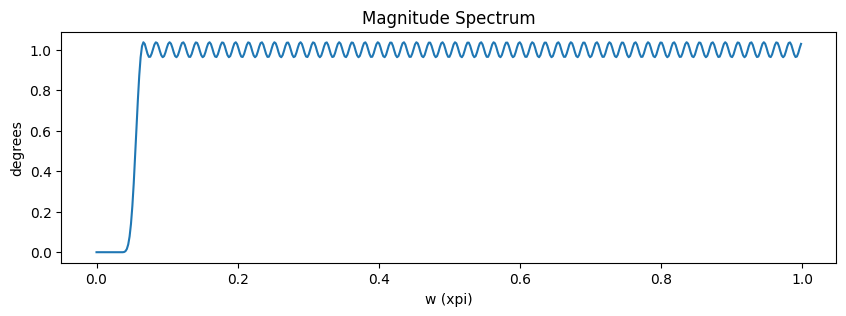

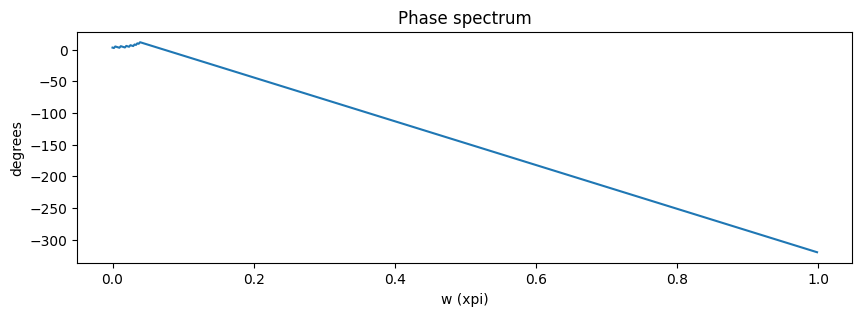

In [15]:
# low pass filter
w, Hw = sgnl.freqz(b,a)

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

plt.figure(figsize=[10,3])
plt.plot(w/np.pi, Hw_mag)
plt.title("Magnitude Spectrum")
plt.ylabel('degrees')
plt.xlabel("w (xpi)")
plt.show()

plt.figure(figsize=[10,3])
plt.plot(w/np.pi, Hw_phs), 
plt.ylabel('degrees')
plt.title("Phase spectrum")
plt.xlabel("w (xpi)")
plt.show()




##fourier
N = 48000

# Downsample the audio data
downsample_factor = 4
a1_downsampled = a2_[::downsample_factor]
N_downsampled = len(a1_downsampled)



In [16]:
import scipy.stats
import re

# Function to compute Kendall's Tau for all MFCCs of a species
def compute_kendall_tau(mfcc_input, species_prefix):
    similarity_scores = []
    # Create a static list of global variable names to iterate over
    global_vars = list(globals().keys())
    
    # Use regular expression to find all corresponding mfcc variables
    pattern = re.compile(f"^mfcc_{species_prefix}\\d+$")
    for var_name in global_vars:
        if pattern.match(var_name):
            mfcc_data = globals()[var_name]
            if mfcc_data is not None:
                similarity_score = scipy.stats.kendalltau(mfcc_input, mfcc_data)
                similarity_var_name = f"similarity_{var_name[5:]}"  # removes 'mfcc_' prefix
                globals()[similarity_var_name] = similarity_score
                print(f"{similarity_var_name}: {similarity_score}")
                if similarity_score.correlation is not None:  # Ensure the correlation is not None before appending
                    similarity_scores.append(similarity_score.correlation)
    return similarity_scores



# Compute Kendall's Tau for Long-tailed Duck and store the mean correlation
similarity_to_Long_tailed_Duck = compute_kendall_tau(mfcc_input, 'a')
mean_Long_tailed_Duck = sum(similarity_to_Long_tailed_Duck) / len(similarity_to_Long_tailed_Duck) if similarity_to_Long_tailed_Duck else 0

# Compute Kendall's Tau for Velvet Scoter and store the mean correlation
similarity_to_Velvet_Scoter = compute_kendall_tau(mfcc_input, 'b')
mean_Velvet_Scoter = sum(similarity_to_Velvet_Scoter) / len(similarity_to_Velvet_Scoter) if similarity_to_Velvet_Scoter else 0

similarity_to_Aquatic_Warbler = compute_kendall_tau(mfcc_input, 'c')
mean_Aquatic_Warbler = sum(similarity_to_Aquatic_Warbler) / len(similarity_to_Aquatic_Warbler) if similarity_to_Aquatic_Warbler else 0

similarity_to_Atlantic_Puffin = compute_kendall_tau(mfcc_input, 'd')
mean_Atlantic_Puffin = sum(similarity_to_Atlantic_Puffin) / len(similarity_to_Atlantic_Puffin) if similarity_to_Atlantic_Puffin else 0

similarity_to_Balearic_Shearwater = compute_kendall_tau(mfcc_input, 'e')
mean_Balearic_Shearwater = sum(similarity_to_Balearic_Shearwater) / len(similarity_to_Balearic_Shearwater) if similarity_to_Balearic_Shearwater else 0

similarity_to_Black_legged_Kittiwake = compute_kendall_tau(mfcc_input, 'f')
mean_Black_legged_Kittiwake = sum(similarity_to_Black_legged_Kittiwake) / len(similarity_to_Black_legged_Kittiwake) if similarity_to_Black_legged_Kittiwake else 0

similarity_to_Great_Bustard = compute_kendall_tau(mfcc_input, 'g')
mean_Great_Bustard = sum(similarity_to_Great_Bustard) / len(similarity_to_Great_Bustard) if similarity_to_Great_Bustard else 0

similarity_to_Horned_Grebe = compute_kendall_tau(mfcc_input, 'h')
mean_Horned_Grebe = sum(similarity_to_Horned_Grebe) / len(similarity_to_Horned_Grebe) if similarity_to_Horned_Grebe else 0

similarity_to_Leachs_Storm_Petrel = compute_kendall_tau(mfcc_input, 'i')
mean_Leachs_Storm_Petrel = sum(similarity_to_Leachs_Storm_Petrel) / len(similarity_to_Leachs_Storm_Petrel) if similarity_to_Leachs_Storm_Petrel else 0

similarity_to_European_Turtle_Dove = compute_kendall_tau(mfcc_input, 'j')
mean_European_Turtle_Dove = sum(similarity_to_European_Turtle_Dove) / len(similarity_to_European_Turtle_Dove) if similarity_to_European_Turtle_Dove else 0


# Hashmap to store the mean correlation values
sum_dictionary = {
    "Long_tailed_Duck_Clangula_hyemalis": mean_Long_tailed_Duck,
    "Velvet_Scoter_Melanitta_fusca": mean_Velvet_Scoter,
    "Aquatic_Warbler_Acrocephalus_paludicola": mean_Aquatic_Warbler,
    "Atlantic_Puffin_Fratercula_arctica": mean_Atlantic_Puffin,
    "Balearic_Shearwater_Puffinus_mauretanicus": mean_Balearic_Shearwater,
    "Black_legged_Kittiwake_Rissa_tridactyla": mean_Black_legged_Kittiwake,
    "Great_Bustard_Otis_tarda": mean_Great_Bustard,
    "Horned_Grebe_Podiceps_auritus": mean_Horned_Grebe,
    "Leach's_Storm_Petrel_Hydrobates_leucorhous": mean_Leachs_Storm_Petrel,
    "European_Turtle_Dove_Streptopelia_turtur": mean_European_Turtle_Dove
    # Add other species and their mean correlation values here
}

# Print cumulative correlations
print("\nCumulative Correlations")
for species, mean_correlation in sum_dictionary.items():
    print(f"{species}: {mean_correlation}")

# Find and print the owner of the audio based on the highest mean correlation
owner_of_audio = max(sum_dictionary, key=sum_dictionary.get)
print("\nOwner of the audio:", owner_of_audio)

# Find the most similar sample:
similarities = {var_name: globals()[var_name].correlation for var_name in globals() if var_name.startswith('similarity_') and hasattr(globals()[var_name], 'correlation')}
most_similar_key = max(similarities, key=similarities.get)
most_similar_sample = most_similar_key.replace('similarity_', '')

print(f"Most similar sample: {most_similar_sample}, Kendall's Tau correlation: {similarities[most_similar_key]}")
mfcc_similar = globals()['mfcc_d191']

similarity_a1: SignificanceResult(statistic=0.33066064336020634, pvalue=9.02992291154978e-210)
similarity_a10: SignificanceResult(statistic=0.34650638118192517, pvalue=3.765501986757616e-230)
similarity_a100: SignificanceResult(statistic=0.32287324819452495, pvalue=4.241949271871517e-200)
similarity_a101: SignificanceResult(statistic=0.28735252615677503, pvalue=6.317804990359028e-159)
similarity_a102: SignificanceResult(statistic=0.39343425522953446, pvalue=4.320272949863628e-296)
similarity_a103: SignificanceResult(statistic=0.3417574529877162, pvalue=6.074455510034744e-224)
similarity_a104: SignificanceResult(statistic=0.3810112518588361, pvalue=8.021531233820632e-278)
similarity_a105: SignificanceResult(statistic=0.3936924498979867, pvalue=1.7766959659246837e-296)
similarity_a11: SignificanceResult(statistic=0.3750476170552011, pvalue=2.9257438147623666e-269)
similarity_a113: SignificanceResult(statistic=0.3263092025478915, pvalue=2.4303301423298035e-204)
similarity_a114: Significan

In [17]:
def plot_frequency_spectrum(audio_signal, sampling_rate, title):
    # Number of samplepoints
    N = len(audio_signal)
    # sample spacing
    T = 1.0 / sampling_rate
    x = np.linspace(0.0, N*T, N, endpoint=False)
    yf = fft(audio_signal)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    
    plt.figure(figsize=(6, 4))
    plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    plt.grid()
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.show()


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def plot_mfcc(mfcc_features, title):
    # Swap axes for better visualization
    mfcc_data = np.swapaxes(mfcc_features, 0, 1)
    
    # Create the plot
    fig, ax = plt.subplots()
    cax = ax.imshow(mfcc_data, interpolation='nearest', cmap=cm.coolwarm, origin='lower', aspect='auto')
    
    # Set the title of the plot
    ax.set_title(title)
    
    # Enhancing the plot with color bar and labels for clarity
    fig.colorbar(cax, ax=ax, format='%+2.0f dB')
    ax.set_xlabel('Time Frame')
    ax.set_ylabel('MFCC Coefficients')
    
    # Display the plot
    plt.show()


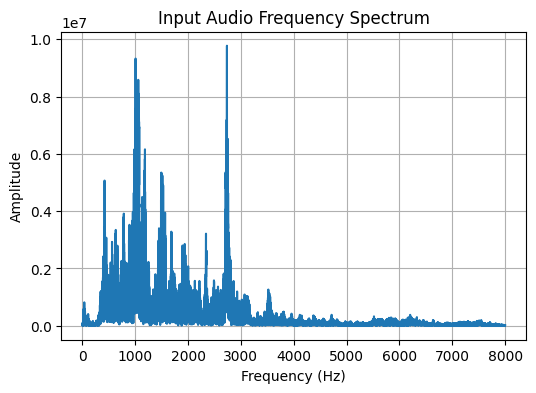

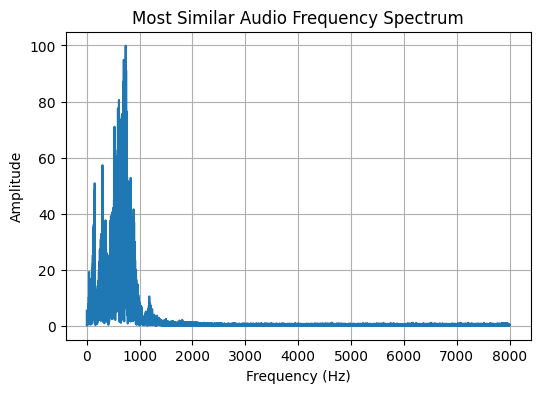

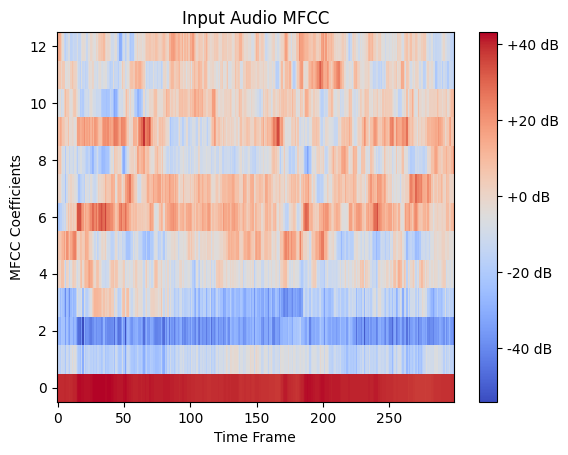

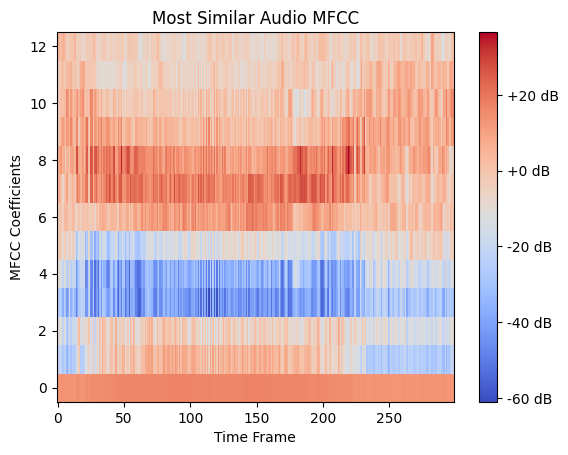

In [19]:
plot_frequency_spectrum(input_audio_Pure, Fs, "Input Audio Frequency Spectrum")
plot_frequency_spectrum(d191, Fs, "Most Similar Audio Frequency Spectrum")

plot_mfcc(mfcc_input, "Input Audio MFCC")
plot_mfcc(mfcc_similar, "Most Similar Audio MFCC")
